# Project Description

This project uses the built-in requests library to send a GET request to a website, Google News (https://www.news.google.com). It also utilizes the Beautiful Soup library to parse headlines (found in the site's html text) from the Google News website. Beautiful Soup can parse html and xml from websites.

Then, I use matplotlib.pyplot and wordcloud to generate different graphics displaying the most frequently occurring words (sans articles like "the" or "a", or).

## Project Code

In [1]:
from my_module.functions import get_headlines, print_headlines,\
                                count_occurrences, most_common_words

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import os

In [3]:
headlines = get_headlines('https://www.news.google.com')

In [4]:
print_headlines(headlines[:5])

(0.) Trump says he would accept dirt on political rivals from foreign governments
(1.) Trump says he would 'want to hear' dirt on 2020 rivals from foreign governments, suggests he wouldn't conta...
(2.) Adam Schiff threatens to subpoena FBI Director Chris Wray
(3.) EXCLUSIVE: Trump says he would listen if foreigners offered dirt on opponents
(4.) Hope Hicks’s testimony will be a crack in Trump’s wall


In [5]:
print(headlines[0])

Trump says he would accept dirt on political rivals from foreign governments


In [6]:
search_text = " ".join(headlines)

In [7]:
count_trump = count_occurrences('Trump', search_text)
count_biden = count_occurrences('Biden', search_text)
count_congress = count_occurrences('Congress', search_text)

In [8]:
print(count_trump)

11


In [9]:
print(count_biden)

2


In [10]:
print(count_congress)

4


In [11]:
most_common_words(10, search_text)

[('Trump', 11),
 ('House', 9),
 ('U.S', 8),
 ('census', 6),
 ('Hunter', 6),
 ('US', 6),
 ('SpaceX', 6),
 ('Ortiz', 5),
 ('TheHill', 5),
 ('Hong', 5)]

In [12]:
top_15 = most_common_words(15, search_text)

In [13]:
keywords = [item[0] for item in top_15]

In [14]:
frequencies = [item[1] for item in top_15]

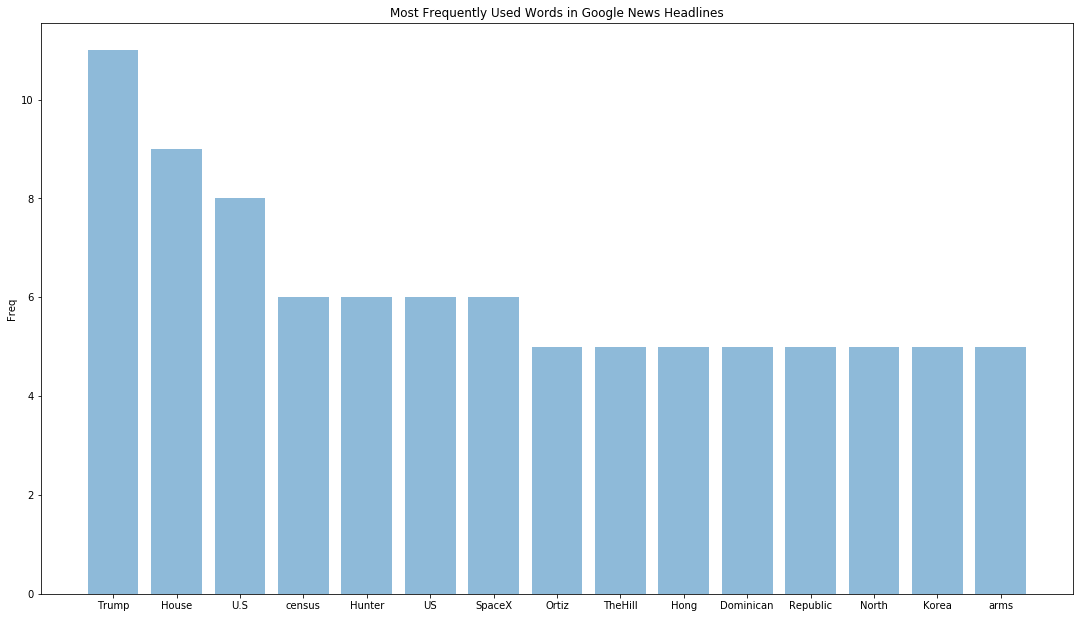

In [15]:
y_pos = np.arange(len(keywords))

plt.bar(y_pos, frequencies, align='center', alpha=0.5)
plt.xticks(y_pos, keywords)
plt.ylabel('Freq')
plt.title('Most Frequently Used Words in Google News Headlines')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.show()

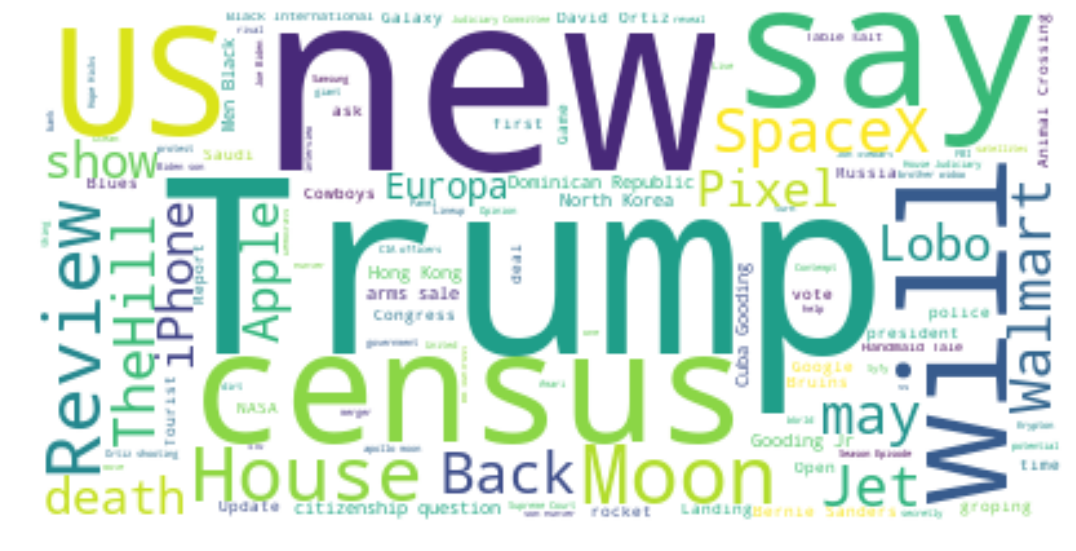

In [16]:
wc2 = WordCloud(background_color="white", max_words=2000,
                contour_width=3, contour_color='steelblue')
wc2.generate(search_text)
fig3 = plt.gcf()
fig3.set_size_inches(18.5, 10.5)
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.show()

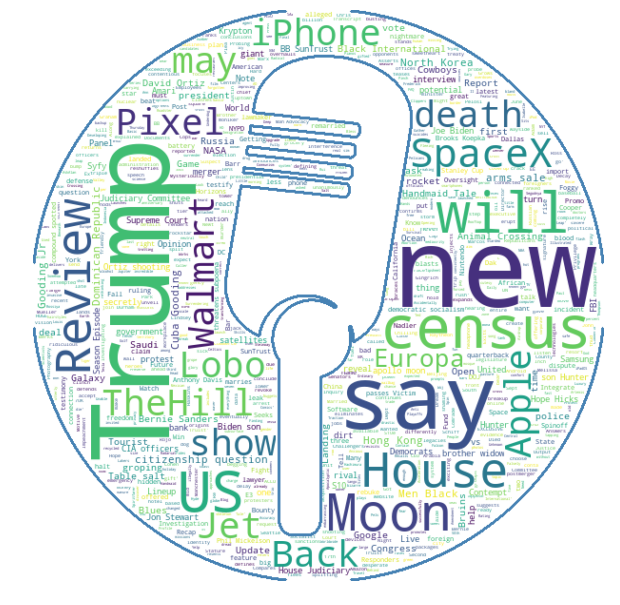

In [17]:
news_mask = np.array(Image.open(os.path.join(os.getcwd(), "microphone.png")))

wc = WordCloud(background_color="white", max_words=2000, mask=news_mask,
               contour_width=3, contour_color='steelblue')

wc.generate(search_text)
wc.to_file(os.path.join(os.getcwd(), "news_wordcloud.png"))

fig2 = plt.gcf()
fig2.set_size_inches(10.5, 10.5)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()